# Exercise 1:

The notebook will guide through some basic details of Sentinel-1 and Sentinel-2 data:

    * Different sensor characteristics
    * How to search and preview data
    * Main aspects to consider when dealing with Sentinel-1 data

# Sentinel-1 and Sentinel-2

Free and Open Data Policy: [scihub](https://scihub.copernicus.eu/)

## [Sentinel-1](https://en.wikipedia.org/wiki/Sentinel-1)

* A constellation of two satellites, Sentinel-1A and Sentinel-1B
* C-band synthetic-aperture radar (SAR)
* Collection of data in all-weather, day or night
* Spatial resolution of down to 5 m and a swath of up to 400 km
* Sun synchronous, near-polar (98.18°) orbit
* The orbit has a 12-day repeat cycle

## [Sentinel-2](https://en.wikipedia.org/wiki/Sentinel-2)

* A constallation of two twin satellites, Sentinel-2A and Sentinel-2B
* Multi-spectral data with 13 bands in the visible, near infrared, and short wave infrared part of the spectrum
* Systematic global coverage of land surfaces from 56° S to 84° N, coastal waters, and all of the Mediterranean Sea
* High spatial resolution (10 m to 60 m). 290 km field of view
* The orbit is Sun synchronous at 786 km (488 mi) altitude
* Revisiting every 10 days under the same viewing angles. At high latitudes, Sentinel-2 swath overlap and some regions will be observed twice or more every 10 days, but with different viewing angles

## Example Searching and previewing a Sentinel-1 and Sentinel-2 image

Installing some libraries to interact with ESA Scihub

In [1]:
!/opt/anaconda/envs/env_better/bin/pip3 install sentinelsat folium shapely

### Defining a certain area of interest 

In [2]:
import folium
from sentinelsat import SentinelAPI
import shapely.wkt
import pandas as pd
import geopandas

wkt = 'POLYGON((-4.430811972177363 36.69549864402423,-4.399230541551978 36.69549864402423,-4.399230541551978 36.72132011062699,-4.430811972177363 36.72132011062699,-4.430811972177363 36.69549864402423))'
geojson = shapely.wkt.loads(wkt)

m = folium.Map([36.69, -4.4], zoom_start=13)
folium.GeoJson(geojson, name='AOI').add_to(m)
folium.LayerControl().add_to(m)
m

The Scihub service needs credentials to access to the data, but an account can be created for free --> [Scihub](https://scihub.copernicus.eu/)

In [4]:
import getpass

user = 'obarrile'
password = getpass.getpass() 

 ········


In [5]:
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
dates = ('20201014', '20201018')
productsS2 = api.query(wkt,
                     date = dates,
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

productsS1 = api.query(wkt,
                     date = dates,
                     platformname = 'Sentinel-1',
                     producttype = 'GRD')



S2_data = api.to_geojson(productsS2)
S2_gdf = api.to_geodataframe(productsS2)
S1_data = api.to_geojson(productsS1)
S1_gdf = api.to_geodataframe(productsS1)
products_gdf = pd.concat([S1_gdf, S2_gdf])
products_gdf

/opt/anaconda/envs/env_better/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,missiondatatakeid,orbitnumber,...,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage,cloudcoverpercentage,level1cpdiidentifier,processingbaseline,s2datatakeid,platformserialidentifier,processinglevel
8c6f08cc-ddc7-4fea-a859-ad2679cf4b60,S1A_IW_GRDH_1SDV_20201015T061905_20201015T0619...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-15T06:19:05.915Z, Instrument: SA...",2020-10-15 06:19:05.915,2020-10-15 06:19:30.914,2020-10-15 11:28:50.084,265819.0,34803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dde5cd11-353f-4f94-ab6e-b8824f63e03d,S1A_IW_GRDH_1SDV_20201014T181843_20201014T1819...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-14T18:18:43.089Z, Instrument: SA...",2020-10-14 18:18:43.089,2020-10-14 18:19:08.087,2020-10-14 22:44:46.330,265760.0,34796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5517b5b4-44d1-4b57-ba0b-fe78b7d70015,S2B_MSIL2A_20201015T105939_N0214_R094_T30SUF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-15T10:59:39.024Z, Instrument: MS...",2020-10-15 10:59:39.024,2020-10-15 10:59:39.024,2020-10-15 20:41:15.206,NaN,18853,...,1.81147,1.010521,2.656706,0.001981,7.661152,S2B_OPER_MSI_L1C_TL_EPAE_20201015T120336_A0188...,02.14,GS2B_20201015T105939_018853_N02.14,Sentinel-2B,Level-2A


Display the locations of returned results in the map

In [6]:
style_me = lambda feature: {
        'fillOpacity': 0.3,
        'weight': 1,
        'fillColor': '#FF0000' if 'S2' in feature['properties']['title'] else '#00FF00'
    }


m = folium.Map([36.69, -4.4], zoom_start=8)
folium.GeoJson(geojson, name='AOI').add_to(m)
s1_folium = folium.GeoJson(data = S1_gdf[['geometry','title','link_icon']], 
               style_function = style_me,
               name = 'Sentinel-1 products',
               ).add_to(m)
s2_folium = folium.GeoJson(data = S2_gdf[['geometry','title','link_icon']], 
               style_function = style_me,
               name='Sentinel-2 products',
               ).add_to(m)

folium.LayerControl().add_to(m)
m

Filter only products at a specific date

In [7]:
import datetime

date_of_interest = '15-10-2020'

filtered_gdf = products_gdf[products_gdf['beginposition'].apply( lambda d: d.date() == datetime.datetime.strptime(date_of_interest,'%d-%m-%Y').date())]
filtered_gdf

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,missiondatatakeid,orbitnumber,...,unclassifiedpercentage,mediumprobacloudspercentage,highprobacloudspercentage,snowicepercentage,cloudcoverpercentage,level1cpdiidentifier,processingbaseline,s2datatakeid,platformserialidentifier,processinglevel
8c6f08cc-ddc7-4fea-a859-ad2679cf4b60,S1A_IW_GRDH_1SDV_20201015T061905_20201015T0619...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-15T06:19:05.915Z, Instrument: SA...",2020-10-15 06:19:05.915,2020-10-15 06:19:30.914,2020-10-15 11:28:50.084,265819.0,34803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5517b5b4-44d1-4b57-ba0b-fe78b7d70015,S2B_MSIL2A_20201015T105939_N0214_R094_T30SUF_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-10-15T10:59:39.024Z, Instrument: MS...",2020-10-15 10:59:39.024,2020-10-15 10:59:39.024,2020-10-15 20:41:15.206,NaN,18853,...,1.81147,1.010521,2.656706,0.001981,7.661152,S2B_OPER_MSI_L1C_TL_EPAE_20201015T120336_A0188...,02.14,GS2B_20201015T105939_018853_N02.14,Sentinel-2B,Level-2A


Display the quicklooks in the map to compare the differences

In [9]:
import io
import requests
import numpy as np
from scipy.ndimage import rotate
from requests.auth import HTTPBasicAuth
from PIL import Image

m = folium.Map([36.69, -4.4], zoom_start=8)

for i, row in filtered_gdf.iterrows():
    quicklook_query = requests.get(row['link_icon'], auth=HTTPBasicAuth(user,password))
    img_data = np.asarray(Image.open(io.BytesIO(quicklook_query.content)))
    #print(img_data)
    bounds = row['geometry'].bounds
    img = folium.raster_layers.ImageOverlay(
        name=row['title'],
        # FIXME: This is just an example for visualization purposes, 
        #        it does not generalise to all acquisitions
        image=img_data if 'S2' in row['title'] else rotate(img_data, -10, reshape=True), 
        bounds=[[bounds[1], bounds[0]], [bounds[3], bounds[2]]],
        opacity=0.5)
    #print(row['geometry'].bounds)
    img.add_to(m)
    

folium.GeoJson(geojson, name='AOI').add_to(m)
folium.LayerControl().add_to(m)
m
    

## How does SAR work?
SAR is a Radar: a beam of energy is emitted from an antenna. As they strike objects the energy is scattered in all directions with some of the energy reflected directly back to the radar. 

Synthetic Aperture Radar: uses the motion of the radar antenna over a target region to provide finer spatial resolution than conventional beam-scanning radars.

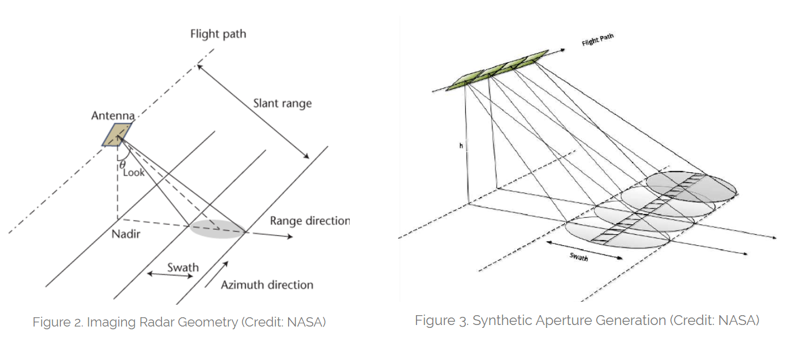

Images are not very intuitive because we are not used to see them. They have geometric distortions and the pixel value is completely different to what we see with our eyes (or with optical sensors).

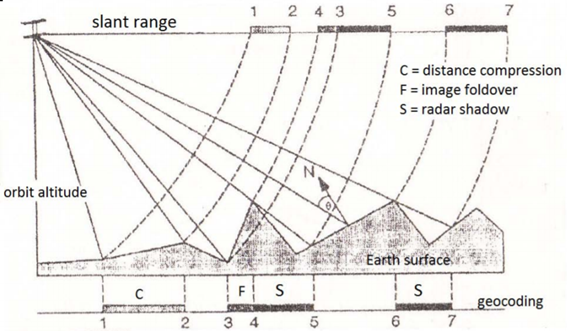

The pixel values are proportional to the amount of energy received and it depends on the amount of energy the SAR sensor transmitted, the properties and shape of the object and the angle from which the object is viewed.

## SAR image example 

TODO: show a couple of images for simple interpretation examplea:

-  e.g. foreshortening and layover
-  cloudy example S1 vs S2


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

fp = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
fpT2= 'https://store.terradue.com/obarrilero/_results/workflows/ec_nextgeoss_ewf_s2_mad_ewf_s2_mad_0_11/run/5d6083d2-0888-11eb-9d01-0242ac11000d/0078863-200713102632727-oozie-oozi-W/ae2e971f-c8c5-447a-aefc-7e78729bfdd7/cd_L2A_T50RKU_A012499_20190729T025903_L2A_T50RKU_A024768_20200320T030130.tif'
# Open the COG
with rasterio.open(fp) as src:
    # List of overviews from biggest to smallest
    oviews = src.overviews(1)

    # Retrieve the smallest thumbnail
    oview = oviews[-1]
    print('Decimation factor= {}'.format(oview))
    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
from helpers import *
fpT2= 'https://store.terradue.com/obarrilero/_results/workflows/ec_nextgeoss_ewf_s2_mad_ewf_s2_mad_0_11/run/5d6083d2-0888-11eb-9d01-0242ac11000d/0078863-200713102632727-oozie-oozi-W/ae2e971f-c8c5-447a-aefc-7e78729bfdd7/cd_L2A_T50RKU_A012499_20190729T025903_L2A_T50RKU_A024768_20200320T030130.tif'
aoi_bbox = '114,30.50,114.2,30.55'
aoi = [float(coord) for coord in aoi_bbox.split(',')]
user='YOURuser'
api_key='YOURkey'
img_data = vsi_download(fpT2, aoi, user, api_key)

In [ ]:
print(img_data.shape)

fig = plt.figure(figsize=(20,20))
a=fig.add_subplot(1, 1, 1)
a.set_title('titulo')
width = 12
height = 12
data = img_data
    
imgplot = plt.imshow(data.reshape(data.shape[0],data.shape[1]), cmap=plt.cm.gray) #, vmin=-5, vmax=15)

plt.tight_layout()
fig = plt.gcf()
plt.show()

fig.clf()
plt.close()

## Optical image example

TODO: Show a couple of png examples of different areas

## Some Conclusions:

| Attribute   |      Optical      |  Radar |
|----------|:-------------:|------:|
| Source of energy |  Sun. Passive collection of relfected optical light | Active Sensor. Collection of reflected microwave energy |
| Typical spatial resolution |    Good   |  Fair/Poor |
| Affected by weather | Yes. Clouds, haze, low light |    No. Able to penetrate clouds |
| Day/Night | Day Only |    Day/Night |
| Interpretation | Familiar View |    Requires specialization and knowledge |


## Proposed Exercise:

   * [ ] Create an account in Scihub
   * [ ] Browse the documentation of [sentinelsat library](https://sentinelsat.readthedocs.io/en/stable/)
   * [ ] Search for a Sentinel-2 L2A scene on your Area
   * [ ] Visualize the preview